### Ejercicio de clasificadores 01

Vamos a poner en práctica los algoritmos de clasificación que hemos aprendido hasta el momento.

Utilizando el dataset de **`BreastCancer.xlsx`** vamos a implementar todos los modelos de clasificación que hemos aprendido y vamos a comparar las métricas de cada modelo para ver cual modelo se desempeña mejor.

**Guarda las métricas en un DataFrame para poder compararlas.**

**Recuerda hacer el preprocesamiento necesario.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Modelos de Clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_excel("BreastCancer.xlsx")

df.head(3)

,Clump Thickness,Uniformity of Cell Size,niformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0


In [4]:
X = np.array(df.drop("Class", axis = 1))

y = np.array(df["Class"])

X.shape, y.shape

((699, 9), (699,))

In [5]:
# Normalización de datos

from sklearn.preprocessing import MinMaxScaler

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (489, 9), y_train: (489,)
X_test: (210, 9),  y_test: (210,)


In [ ]:
# 3-Nearest Neighbors

model = KNeighborsClassifier(n_neighbors = 3)

model.fit(X_train, y_train)

In [ ]:
model = RadiusNeighborsClassifier(radius = 0.5)
model.fit(X_train, y_train)

In [ ]:
# NearestCentroid

model = NearestCentroid(metric = "euclidean")

model.fit(X_train, y_train)

In [7]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

In [31]:
def hecho_encasa(vecinos,radio):
    # 3-Nearest Neighbors
    model = KNeighborsClassifier(n_neighbors = vecinos)

    cercanos=model.fit(X_train, y_train)
    yhat1 = model.predict(X_test)


    print("Jaccard Index:", jaccard_score(y_test, yhat1, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat1))
    print("Precisión:"    , precision_score(y_test, yhat1, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat1, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat1, average = "macro"))
    print("ROC AUC:", roc_auc_score(y_test, yhat1))
    

    print ("*"*100)
    
    model = RadiusNeighborsClassifier(radius = radio, outlier_label = "most_frequent")
    radios_vecinos=model.fit(X_train, y_train)
    yhat2 = model.predict(X_test)


    print("Jaccard Index:", jaccard_score(y_test, yhat2, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat2))
    print("Precisión:"    , precision_score(y_test, yhat2, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat2, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat2, average = "macro"))
    print("ROC AUC:", roc_auc_score(y_test, yhat2))
    
    print ("*"*100)
    
    model = NearestCentroid(metric = "euclidean")
    centroides=model.fit(X_train, y_train)
    yhat3 = model.predict(X_test)

    print("Jaccard Index:", jaccard_score(y_test, yhat3, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat3))
    print("Precisión:"    , precision_score(y_test, yhat3, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat3, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat3, average = "macro"))
    print("ROC AUC:", roc_auc_score(y_test, yhat3))
    
    print ("*"*100) 
    
    model = GaussianNB()
    bayes = model.fit(X_train, y_train)
    yhat4 = model.predict(X_test)

    print("Jaccard Index:", jaccard_score(y_test, yhat4, average = "macro"))
    print("Accuracy:"     , accuracy_score(y_test, yhat4))
    print("Precisión:"    , precision_score(y_test, yhat4, average = "macro"))
    print("Sensibilidad:" , recall_score(y_test, yhat4, average = "macro"))
    print("F1-score:"     , f1_score(y_test, yhat4, average = "macro"))
    print("ROC AUC:", roc_auc_score(y_test, yhat4))
    
    print ("*"*100)   


In [40]:
hecho_encasa(3,0.5)

Jaccard Index: 0.9466448282707961
Accuracy: 0.9761904761904762
Precisión: 0.9744318181818181
Sensibilidad: 0.9706189333055004
F1-score: 0.9724922061250687
ROC AUC: 0.9706189333055005
****************************************************************************************************
Jaccard Index: 0.6660419790104948
Accuracy: 0.8428571428571429
Precisión: 0.8835679314565483
Sensibilidad: 0.7616637094249035
F1-score: 0.7904761904761904
ROC AUC: 0.7616637094249035
****************************************************************************************************
Jaccard Index: 0.9158301158301159
Accuracy: 0.9619047619047619
Precisión: 0.9596816976127321
Sensibilidad: 0.9521970566746687
F1-score: 0.9558080808080809
ROC AUC: 0.9521970566746686
****************************************************************************************************
Jaccard Index: 0.917619272555503
Accuracy: 0.9619047619047619
Precisión: 0.9505522342689229
Sensibilidad: 0.9640956058866507
F1-score: 0.95683009559

In [47]:
list_ROC_AUC = list()

for k in range(1, 700):
    
    # Modelo
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    # Predicciones
    yhat = model.predict(X_test)
    
    # Metricas
    ROC_AUC_neighbors = accuracy_score(y_test, yhat)
    list_ROC_AUC.append([k, ROC_AUC_neighbors])
    
    print(f"k: {k}, ROC AUC. {ROC_AUC_neighbors}")

k: 1, ROC AUC. 0.9571428571428572
k: 2, ROC AUC. 0.9333333333333333
k: 3, ROC AUC. 0.9761904761904762
k: 4, ROC AUC. 0.9666666666666667
k: 5, ROC AUC. 0.9761904761904762
k: 6, ROC AUC. 0.9666666666666667
k: 7, ROC AUC. 0.9714285714285714
k: 8, ROC AUC. 0.9666666666666667
k: 9, ROC AUC. 0.9714285714285714
k: 10, ROC AUC. 0.9714285714285714
k: 11, ROC AUC. 0.9714285714285714
k: 12, ROC AUC. 0.9761904761904762
k: 13, ROC AUC. 0.9761904761904762
k: 14, ROC AUC. 0.9761904761904762
k: 15, ROC AUC. 0.9761904761904762
k: 16, ROC AUC. 0.9761904761904762
k: 17, ROC AUC. 0.9809523809523809
k: 18, ROC AUC. 0.9714285714285714
k: 19, ROC AUC. 0.9666666666666667
k: 20, ROC AUC. 0.9666666666666667
k: 21, ROC AUC. 0.9666666666666667
k: 22, ROC AUC. 0.9666666666666667
k: 23, ROC AUC. 0.9666666666666667
k: 24, ROC AUC. 0.9666666666666667
k: 25, ROC AUC. 0.9666666666666667
k: 26, ROC AUC. 0.9666666666666667
k: 27, ROC AUC. 0.9666666666666667
k: 28, ROC AUC. 0.9666666666666667
k: 29, ROC AUC. 0.96666666666

k: 240, ROC AUC. 0.9333333333333333
k: 241, ROC AUC. 0.9333333333333333
k: 242, ROC AUC. 0.9333333333333333
k: 243, ROC AUC. 0.9333333333333333
k: 244, ROC AUC. 0.9285714285714286
k: 245, ROC AUC. 0.9285714285714286
k: 246, ROC AUC. 0.9285714285714286
k: 247, ROC AUC. 0.9285714285714286
k: 248, ROC AUC. 0.9285714285714286
k: 249, ROC AUC. 0.9285714285714286
k: 250, ROC AUC. 0.9285714285714286
k: 251, ROC AUC. 0.9285714285714286
k: 252, ROC AUC. 0.9285714285714286
k: 253, ROC AUC. 0.9285714285714286
k: 254, ROC AUC. 0.9285714285714286
k: 255, ROC AUC. 0.9285714285714286
k: 256, ROC AUC. 0.9285714285714286
k: 257, ROC AUC. 0.9285714285714286
k: 258, ROC AUC. 0.9285714285714286
k: 259, ROC AUC. 0.9285714285714286
k: 260, ROC AUC. 0.9285714285714286
k: 261, ROC AUC. 0.9285714285714286
k: 262, ROC AUC. 0.9285714285714286
k: 263, ROC AUC. 0.9285714285714286
k: 264, ROC AUC. 0.9285714285714286
k: 265, ROC AUC. 0.9285714285714286
k: 266, ROC AUC. 0.9238095238095239
k: 267, ROC AUC. 0.923809523

k: 476, ROC AUC. 0.680952380952381
k: 477, ROC AUC. 0.680952380952381
k: 478, ROC AUC. 0.680952380952381
k: 479, ROC AUC. 0.680952380952381
k: 480, ROC AUC. 0.680952380952381
k: 481, ROC AUC. 0.680952380952381
k: 482, ROC AUC. 0.680952380952381
k: 483, ROC AUC. 0.680952380952381
k: 484, ROC AUC. 0.680952380952381
k: 485, ROC AUC. 0.680952380952381
k: 486, ROC AUC. 0.680952380952381
k: 487, ROC AUC. 0.680952380952381
k: 488, ROC AUC. 0.680952380952381
k: 489, ROC AUC. 0.680952380952381


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 489, n_neighbors = 490

In [48]:
list_ROC_AUC = np.array(list_ROC_AUC)

In [49]:
list_ROC_AUC

array([[  1.        ,   0.95714286],
       [  2.        ,   0.93333333],
       [  3.        ,   0.97619048],
       [  4.        ,   0.96666667],
       [  5.        ,   0.97619048],
       [  6.        ,   0.96666667],
       [  7.        ,   0.97142857],
       [  8.        ,   0.96666667],
       [  9.        ,   0.97142857],
       [ 10.        ,   0.97142857],
       [ 11.        ,   0.97142857],
       [ 12.        ,   0.97619048],
       [ 13.        ,   0.97619048],
       [ 14.        ,   0.97619048],
       [ 15.        ,   0.97619048],
       [ 16.        ,   0.97619048],
       [ 17.        ,   0.98095238],
       [ 18.        ,   0.97142857],
       [ 19.        ,   0.96666667],
       [ 20.        ,   0.96666667],
       [ 21.        ,   0.96666667],
       [ 22.        ,   0.96666667],
       [ 23.        ,   0.96666667],
       [ 24.        ,   0.96666667],
       [ 25.        ,   0.96666667],
       [ 26.        ,   0.96666667],
       [ 27.        ,   0.96666667],
 

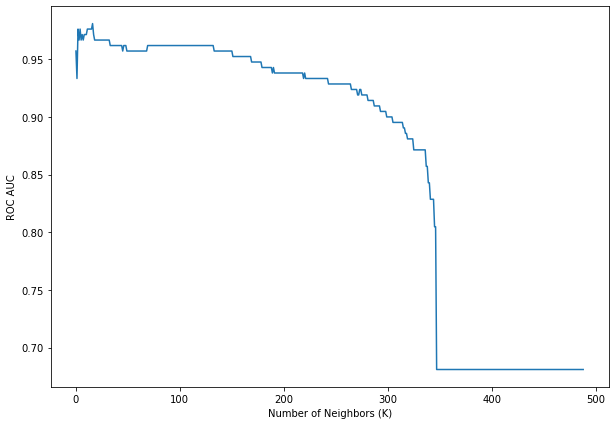

In [50]:
plt.figure(figsize = (10, 7))

plt.plot(list_ROC_AUC[:, 1])

plt.ylabel("ROC AUC")
plt.xlabel("Number of Neighbors (K)")

plt.show()

In [53]:
mejor_indice = np.argmax(list_ROC_AUC[:, 1])
print(mejor_indice)
list_ROC_AUC[16]

16


array([17.        ,  0.98095238])

In [54]:
# Con 17 vecinos (valor del índice 16), la métrica ROC AUC se maximiza